In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


import sys

sys.path.append('../')

from eda import utils

tracks = utils.load('../data/fma_metadata/tracks.csv')
features = utils.load('../data/fma_metadata/features.csv')

In [2]:
small = tracks['set', 'subset'] <= 'small'
X = features.loc[small]
y = tracks['track', 'genre_top'].loc[small]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

c:\Users\jay_w\anaconda3\envs\ecs198G\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\jay_w\anaconda3\envs\ecs198G\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


               precision    recall  f1-score   support

   Electronic       0.56      0.65      0.60       192
 Experimental       0.54      0.40      0.46       193
         Folk       0.59      0.64      0.62       199
      Hip-Hop       0.56      0.68      0.61       198
 Instrumental       0.55      0.54      0.54       216
International       0.61      0.55      0.58       219
          Pop       0.38      0.27      0.31       211
         Rock       0.54      0.67      0.60       172

     accuracy                           0.55      1600
    macro avg       0.54      0.55      0.54      1600
 weighted avg       0.54      0.55      0.54      1600



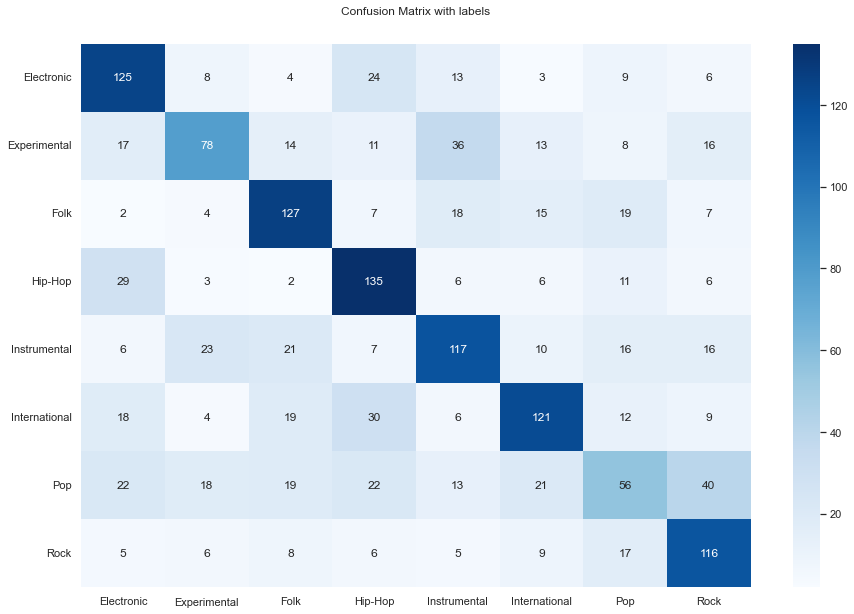

In [4]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier().fit(X=X_train, y=y_train)
y_pred = rfc.predict(X_test)

print(classification_report(y_test, y_pred))
cf_mat = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(15,10)})

ax = sns.heatmap(cf_mat, annot=True, cmap='Blues', fmt='g')
ax.set_xticklabels(rfc.classes_)
kwargs = {'rotation': 'horizontal'}
ax.set_yticklabels(rfc.classes_, **kwargs)

ax.set_title('Confusion Matrix with labels\n\n')

## Display the visualization of the Confusion Matrix.
plt.show()

In [6]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [10, 100, 1000],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [0.5, 1, 2, 4],
    'min_samples_leaf': [0.5, 1, 2],
    'min_weight_fraction_leaf': [0, 0.1],
    'max_features': ['sqrt', 'log2', None],
    'min_impurity_decrease': [0, 0.1, 1],
    'ccp_alpha': [0, 1],
}

rand_search = RandomizedSearchCV(RandomForestClassifier(), params, n_iter=10)
rand_search.fit(X_train, y_train)

print(rand_search.best_params_)

c:\Users\jay_w\anaconda3\envs\ecs198G\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\jay_w\anaconda3\envs\ecs198G\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\jay_w\anaconda3\envs\ecs198G\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\jay_w\anaconda3\envs\ecs198G\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.wa

{'n_estimators': 100, 'min_weight_fraction_leaf': 0, 'min_samples_split': 4, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.1, 'max_features': 'sqrt', 'criterion': 'entropy', 'ccp_alpha': 0}


c:\Users\jay_w\anaconda3\envs\ecs198G\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\jay_w\anaconda3\envs\ecs198G\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jay_w\anaconda3\envs\ecs198G\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jay_w\anaconda3\envs\ecs198G\lib\site-packages\sklearn\metrics\_classification.py:13

               precision    recall  f1-score   support

   Electronic       0.30      0.03      0.06       192
 Experimental       0.33      0.04      0.07       193
         Folk       0.36      0.50      0.42       199
      Hip-Hop       0.27      0.75      0.40       198
 Instrumental       0.34      0.59      0.43       216
International       0.33      0.11      0.16       219
          Pop       0.00      0.00      0.00       211
         Rock       0.30      0.50      0.38       172

     accuracy                           0.31      1600
    macro avg       0.28      0.32      0.24      1600
 weighted avg       0.28      0.31      0.24      1600



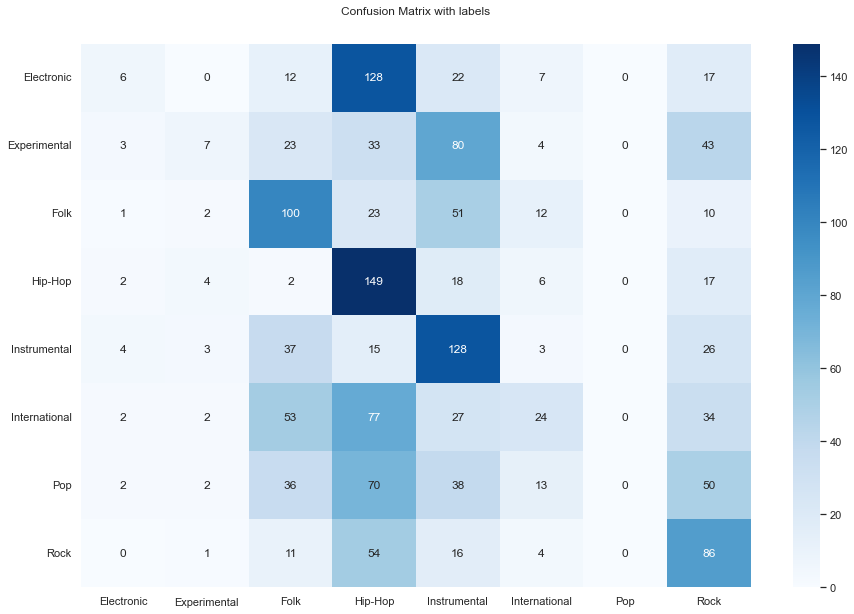

In [7]:
rand_pred = rand_search.predict(X_test)

print(classification_report(y_test, rand_pred))
cf_mat = confusion_matrix(y_test, rand_pred)
sns.set(rc = {'figure.figsize':(15,10)})

ax = sns.heatmap(cf_mat, annot=True, cmap='Blues', fmt='g')
ax.set_xticklabels(rand_search.classes_)
kwargs = {'rotation': 'horizontal'}
ax.set_yticklabels(rand_search.classes_, **kwargs)

ax.set_title('Confusion Matrix with labels\n\n')

## Display the visualization of the Confusion Matrix.
plt.show()